Convolução e correlação

In [2]:
import numpy as np
from scipy import ndimage

In [3]:
v = np.array([[1,2,3], [4,5,6], [7,8,9]])

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [18]:
weights = np.ones([3,3])/9
correlate = ndimage.correlate(v, weights)
print(correlate)

[[2 2 3]
 [4 5 5]
 [6 7 7]]


In [19]:
convolution = ndimage.convolve(v, weights)
print(convolution)

[[2 2 3]
 [4 5 5]
 [6 7 7]]


In [20]:
convolution = ndimage.convolve(v, weights, mode='reflect')
print(convolution)

[[2 2 3]
 [4 5 5]
 [6 7 7]]


In [21]:
convolution = ndimage.convolve(v, weights, mode='constant')
print(convolution)

[[1 2 1]
 [2 5 3]
 [2 4 3]]


In [22]:
convolution = ndimage.convolve(v, weights, mode='nearest')
print(convolution)

[[2 2 3]
 [4 5 5]
 [6 7 7]]


In [23]:
convolution = ndimage.convolve(v, weights, mode='mirror')
print(convolution)

[[3 3 4]
 [4 5 5]
 [5 6 6]]


In [24]:
convolution = ndimage.convolve(v, weights, mode='wrap')
print(convolution)

[[5 5 5]
 [5 5 4]
 [5 4 4]]


Análise de artefatos

In [3]:
import cv2 as cv
import imageio
import matplotlib.pyplot as plt

In [4]:
PIG_IMG = imageio.imread('./PIG_MR')
METADATA = PIG_IMG.meta

PLT_NAME_id = METADATA.PatientID

pxl = METADATA.Columns

In [108]:
mu = 0
sigma = 5

gaussianNoise = np.random.normal(mu, sigma, [pxl, pxl])

In [114]:
imgNoise = PIG_IMG + (gaussianNoise*9)

In [115]:
imgNoise = imgNoise - imgNoise.min()

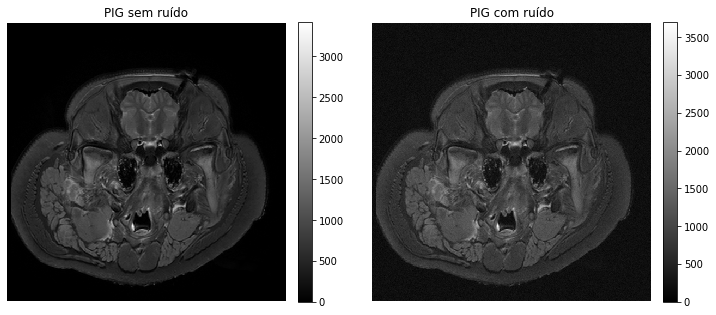

In [168]:
plt.figure(1, figsize=(12,15))
plt.title('Ruído Gaussiano')
plt.subplot(121)
plt.imshow(PIG_IMG, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG sem ruído')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(122)
plt.imshow(imgNoise, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG com ruído')
plt.colorbar(fraction=0.046, pad=0.04)


# Artefatos causados pelo filtro médio

In [6]:
CORTE_1 = PIG_IMG[0:300, 0:300]
CORTE_1_MEDIAN_a = ndimage.median_filter(CORTE_1,size=3)
CORTE_1_MEDIAN_b = ndimage.median_filter(CORTE_1,size=5)
CORTE_1_MEDIAN_c = ndimage.median_filter(CORTE_1,size=10)

(-0.5, 299.5, 299.5, -0.5)

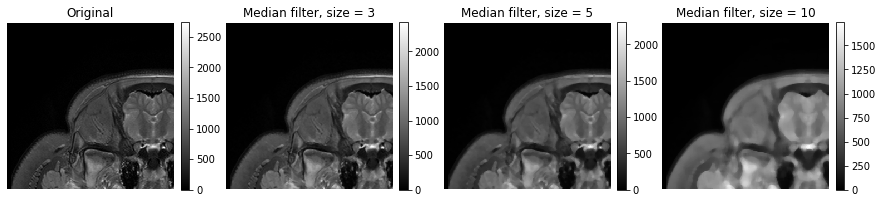

In [7]:
plt.figure(1, figsize=(15,15))
plt.subplot(141)
plt.imshow(CORTE_1, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(CORTE_1_MEDIAN_a, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Median filter, size = 3')
plt.axis('off')

plt.subplot(143)
plt.imshow(CORTE_1_MEDIAN_b, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Median filter, size = 5')
plt.axis('off')

plt.subplot(144)
plt.imshow(CORTE_1_MEDIAN_c, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Median filter, size = 10')
plt.axis('off')

In [21]:
CORTE_2 = PIG_IMG[80:200, 80:200]
CORTE_2_MEDIAN_a = ndimage.median_filter(CORTE_2,size=3)
CORTE_2_MEDIAN_b = ndimage.median_filter(CORTE_2,size=5)
CORTE_2_MEDIAN_c = ndimage.median_filter(CORTE_2,size=10)

(120, 120)


(-0.5, 119.5, 119.5, -0.5)

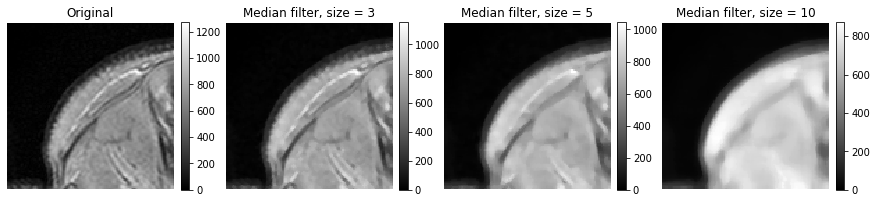

In [9]:
plt.figure(1, figsize=(15,15))
plt.subplot(141)
plt.imshow(CORTE_2, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(CORTE_2_MEDIAN_a, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Median filter, size = 3')
plt.axis('off')

plt.subplot(143)
plt.imshow(CORTE_2_MEDIAN_b, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Median filter, size = 5')
plt.axis('off')

plt.subplot(144)
plt.imshow(CORTE_2_MEDIAN_c, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Median filter, size = 10')
plt.axis('off')

In [10]:
CORTE_3 = PIG_IMG[200:400, 200:400]
CORTE_3_MEDIAN_a = ndimage.median_filter(CORTE_3,size=3)
CORTE_3_MEDIAN_b = ndimage.median_filter(CORTE_3,size=5)
CORTE_3_MEDIAN_c = ndimage.median_filter(CORTE_3,size=10)

(-0.5, 199.5, 199.5, -0.5)

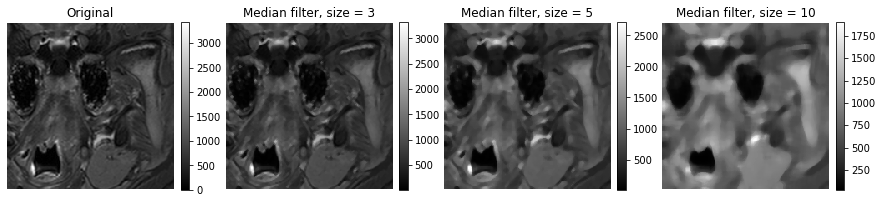

In [11]:
plt.figure(1, figsize=(15,15))
plt.subplot(141)
plt.imshow(CORTE_3, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Original')
plt.axis('off')

plt.subplot(142)
plt.imshow(CORTE_3_MEDIAN_a, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Median filter, size = 3')
plt.axis('off')

plt.subplot(143)
plt.imshow(CORTE_3_MEDIAN_b, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Median filter, size = 5')
plt.axis('off')

plt.subplot(144)
plt.imshow(CORTE_3_MEDIAN_c, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.title('Median filter, size = 10')
plt.axis('off')

# Impulsive noise

In [14]:
import numpy as np
import os
import cv2
from skimage.util import random_noise

In [15]:
def spnoise(image):
      height = image.shape[0]
      width = image.shape[1]
      print(height,width)
      s_vs_p = 0.5
      amount = 0.04 #Alter the number of "noise pixels"
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1
      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out

pig_Noised = spnoise(original)

300 300
/home/ctong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/home/ctong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [27]:
Corte_1_noised = spnoise(CORTE_1)
Corte_2_noised = spnoise(CORTE_2)
Corte_3_noised = spnoise(CORTE_3)

filtred_1 = ndimage.median_filter(Corte_1_noised, size=3)
filtred_2 = ndimage.median_filter(Corte_2_noised, size=3)
filtred_3 = ndimage.median_filter(Corte_3_noised, size=3)

300 300
120 120
200 200
/home/ctong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/home/ctong/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


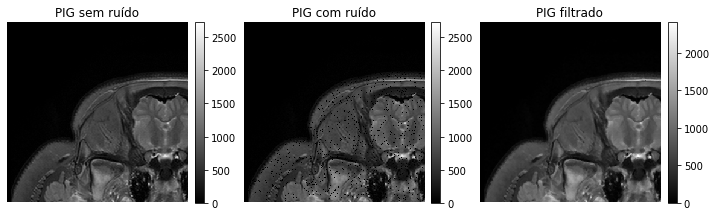

In [26]:
plt.figure(1, figsize=(12,15))
plt.title('Ruído Gaussiano')
plt.subplot(131)
plt.imshow(CORTE_1, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG sem ruído')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(132)
plt.imshow(Corte_1_noised, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG com ruído')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(133)
plt.imshow(filtred_1, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG filtrado')
plt.colorbar(fraction=0.046, pad=0.04)

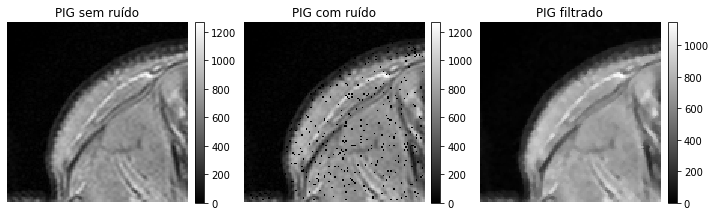

In [29]:
plt.figure(1, figsize=(12,15))
plt.title('Ruído Gaussiano')
plt.subplot(131)
plt.imshow(CORTE_2, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG sem ruído')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(132)
plt.imshow(Corte_2_noised, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG com ruído')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(133)
plt.imshow(filtred_2, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG filtrado')
plt.colorbar(fraction=0.046, pad=0.04)

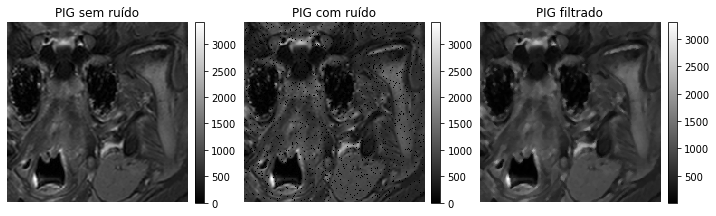

In [30]:
plt.figure(1, figsize=(12,15))
plt.title('Ruído Gaussiano')
plt.subplot(131)
plt.imshow(CORTE_3, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG sem ruído')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(132)
plt.imshow(Corte_3_noised, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG com ruído')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(133)
plt.imshow(filtred_3, cmap='gray')
plt.axis('off')
plt.gca().set_title('PIG filtrado')
plt.colorbar(fraction=0.046, pad=0.04)